# Exploring Yeast Data


In [1]:
# first visualise an image
from skimage.external import tifffile
import matplotlib.pyplot as plt
from pathlib import Path
import os
%matplotlib inline

In [2]:
DATA_DIR = '/Users/cerber/HDev Dropbox/Projects/YNet_ready_data/yeast_v4'
data_path = Path(DATA_DIR)

In [3]:
train_folder = data_path / 'train' / 'mfb1KO_mmr1KO'
train_images = [im_path for im_path in train_folder.iterdir()]

## Lets visualise our images

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x1113b4d30>,
 <matplotlib.image.AxesImage at 0x11142def0>)

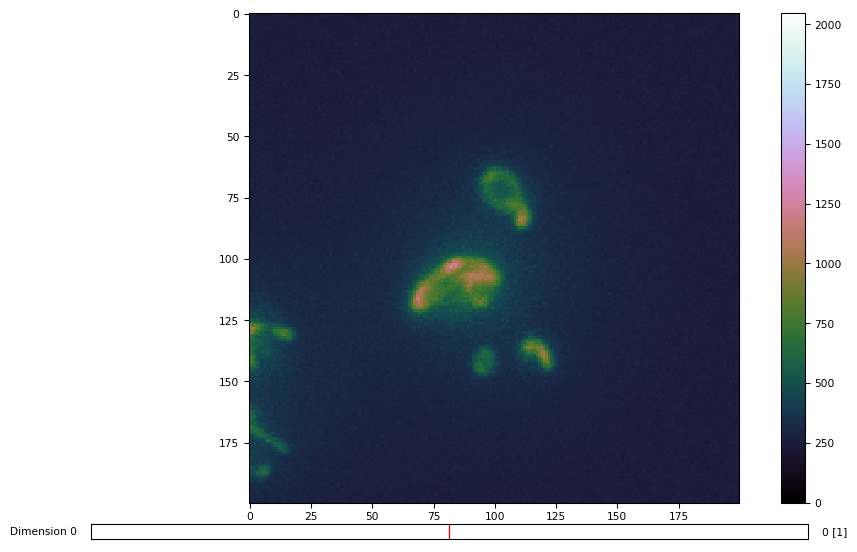

In [4]:
image_vis = tifffile.imread(str(train_images[1]))
tifffile.imshow(image_vis[1,:,:])

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x11153c390>,
 <matplotlib.image.AxesImage at 0x111f3d8d0>)

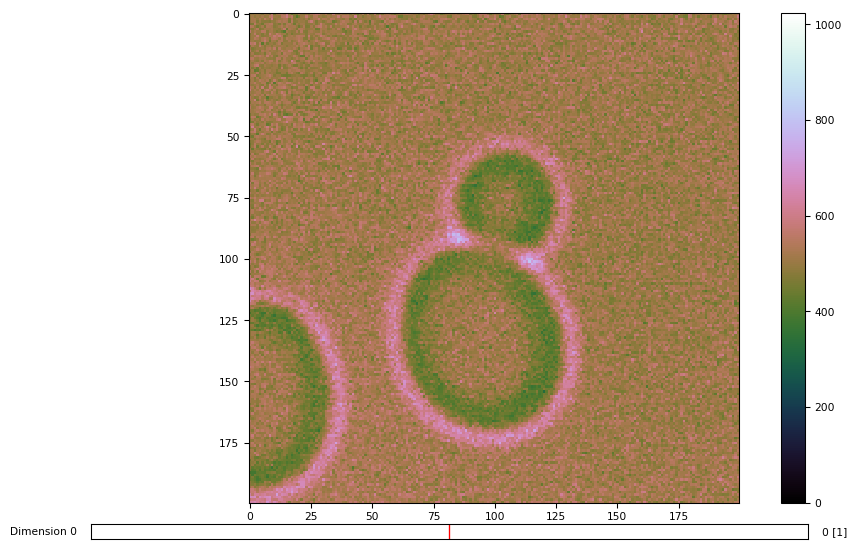

In [5]:
tifffile.imshow(image_vis[0,:,:])

## Calculating the mean and the deviation across the whole dataset 
### mean and stdev should be per channel

In [6]:
from MLDataTools.image_normalization import get_all_files

all_image_paths = get_all_files(data_path)
len(all_image_paths)

714

In [7]:
# calculate
test_dirs , train_dirs = [], []

for ds_dir in data_path.iterdir():
    if '.DS_Store' not in str(ds_dir):
        for class_dir in ds_dir.iterdir():
            if '.DS_Store' not in str(class_dir):
                if 'test' in str(class_dir): test_dirs.append(class_dir)
                elif 'train' in str(class_dir): train_dirs.append(class_dir)

In [8]:
import numpy as np
stats = {} # class_name: (mean, stdev)
class_dirs = zip(test_dirs,train_dirs)
for test, train in class_dirs:
    class_images = []
    class_name = str(test).split('/')[-1]
    class_images = []
    for dir_ in [test,train]:
        # read from each dir and append to the images
        for file in dir_.iterdir():
            image = tifffile.imread(str(file))
            if image.shape[-1] == 200 and image.shape[-2] ==200:
                class_images.append(image)
            else:
                os.remove(str(file)) # get rid of the non square images
                print(f"removed file: {str(file)}")
    # calc std
    print(class_name)
    mean, stdev = np.std(class_images, axis=(0,2,3)), np.mean(class_images, axis=(0,2,3))
    stats[class_name] = (mean, stdev)

mfb1KO
mfb1KO_mmr1KO
mmr1KO
WT


## Lets see what a normalized image looks like

In [9]:
all_images = [] # both train and test
for image_path in all_image_paths:
    image = tifffile.imread(str(image_path))
    all_images.append(image)
len(all_images)

714

In [10]:
idx = 22

all_image_paths[idx] # of mfb1KO class
image = all_images[idx]
norm_image = np.array(image, copy=True)   # make a copy so we can compare
mean , stdev = stats['mfb1KO']
for dim in [0,1]:
    norm_image[dim,:,:] = norm_image[dim,:,:] - mean[dim]
    norm_image[dim,:,:] = norm_image[dim,:,:] / stdev[dim]

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x114c83320>,
 <matplotlib.image.AxesImage at 0x1269defd0>)

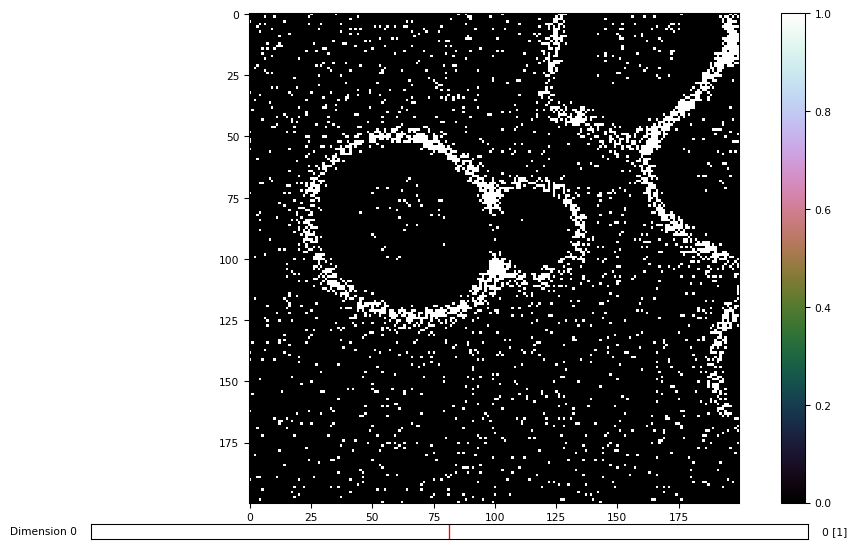

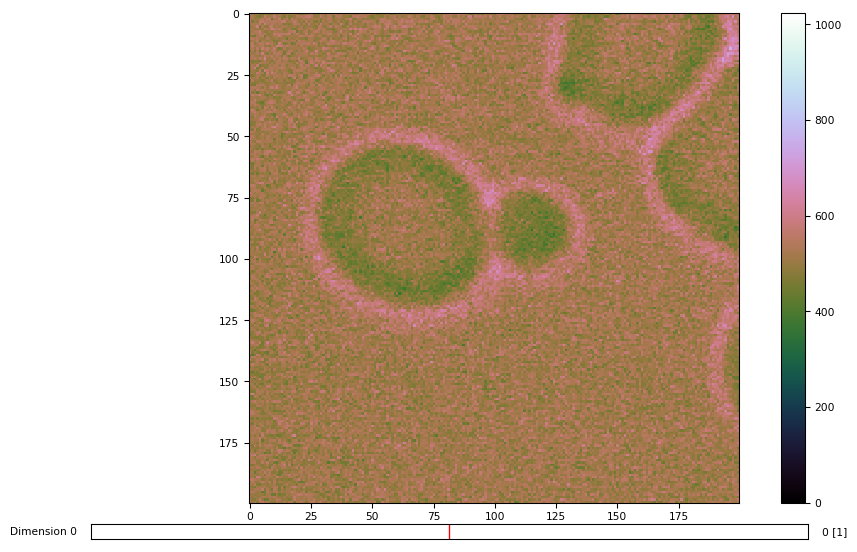

In [11]:
tifffile.imshow(norm_image[0,:,:])
tifffile.imshow(image[0,:,:])

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0, right=0
  'left=%s, right=%s') % (left, right))


(<matplotlib.figure.Figure at 0x114c83be0>,
 <matplotlib.image.AxesImage at 0x126fe6c88>)

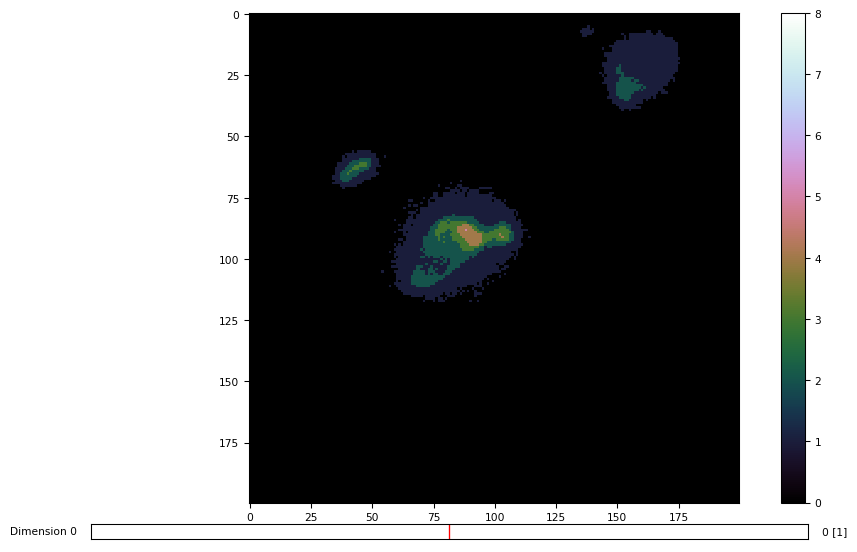

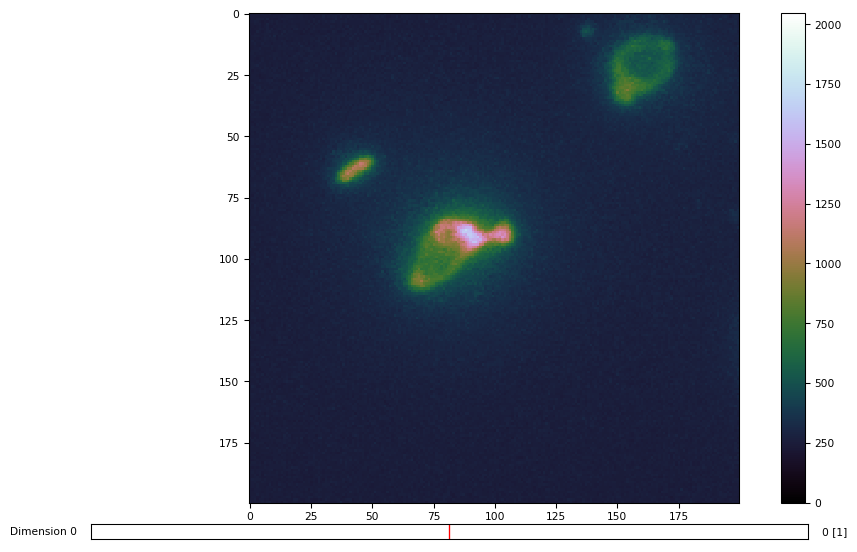

In [12]:
tifffile.imshow(norm_image[1,:,:])
tifffile.imshow(image[1,:,:])

## Finally lets see our stats for later use

In [13]:
stats

{'WT': (array([48.37304926, 95.64728183]),
  array([521.95544101, 310.77445807])),
 'mfb1KO': (array([ 47.58621839, 102.40188124]),
  array([520.43241635, 311.95406937])),
 'mfb1KO_mmr1KO': (array([ 47.79873863, 100.28439551]),
  array([517.82433373, 310.53787264])),
 'mmr1KO': (array([ 49.22677943, 110.97112597]),
  array([522.00261751, 315.86275802]))}

In [15]:
image.shape

(2, 200, 200)